# Compte Rendu TP3 - Opinion Mining

## Explication du problème

Le mouvement des Gilets jaunes est apparu en France en octobre 2018 et s'est étendu dans de moindres proportions à d’autres pays. Ce mouvement social spontané trouve son origine dans la diffusion sur les réseaux sociaux d’appels à manifester.

La mobilisation a pour motivation de départ le rejet de l'augmentation de la taxe intérieure de consommation sur les produits énergétiques (TICPE). Elle s'élargit rapidement à d’autres revendications fiscales et sociales (hausse du pouvoir d'achat des classes moyennes et populaires, maintien des services publics, taxation du kérosène et des fiouls maritimes, rétablissement de l'ISF…), ainsi que politiques (amélioration de la démocratie représentative, notamment par le référendum d'initiative citoyenne, démission du président Emmanuel Macron…).

In [395]:
from IPython.display import HTML
HTML('<iframe width="966" height="543" src="https://www.youtube.com/embed/8lvtYiOiCQU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Présentation de la solution proposée

Comme expliqué précedemment, ce mouvement a debuté et continue à évoluer au cœur des réseaux sociaux.Il serait donc très pértient d'étudier les données issues de ces réseaux dans le but d'extraire l'opinion des internautes à propos de ce phénomene.   
Dans notre cas, nous avons été fournis d'un dataset contenant une cinquentaine de tweets, nous commençerons donc par les étudier puis nous irons chercher plus de données pour une analyse plus riche.

In [396]:
from IPython.display import HTML,display 
display(HTML("<table><tr><td><img src='img1.png'></td><td><img src='img2.png'></td></tr></table>"))

,


## Détails techniques de la méthode

## 1) Data Preprocessing

In [397]:
import pandas as pd
data= pd.read_csv("giletjaune.csv",sep=",",encoding="latin-1")
data.head()

,Date-Time,Twitter handle,Pleasure,Arousal,Tweet,sentiment
0,"12-03-18 07:30,10thCrusader,5.64,4.64,""By the ...",NaN,NaN,NaN,NaN,NaN
1,"12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,""RT @...",NaN,NaN,NaN,NaN,NaN
2,"12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhof...",NaN,NaN,NaN,NaN,NaN
3,"12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenn...",NaN,NaN,NaN,NaN,NaN
4,"12-04-18 01:06,alown6666,5.60,4.14,""@RusoAzul ...",NaN,NaN,NaN,NaN,NaN


In [398]:
new = data["Date-Time"].str.split(",", n = 10, expand = True) 

In [399]:
opinion=""
final=[]
tweet=""
for index, row in new.iterrows():
    if index in [6,10,19,22,31,33,35,50]:
        for i in range(1,3):
            if (row[i] == "Neutral;"):
                opinion="Neutral"
                row[i]=None
            if (row[i] == "Positive;"):
                opinion="Positive"
                row[i]=None
            if (row[i] == "Negative;"):
                opinion="Negative"
                row[i]=None
            if (row[i]!=None):
                tweet=tweet+row[i]
                tweet
            
        final.append(tweet+"^"+opinion)
        tweet=""

In [400]:
new.drop(new.index[[6,10,19,22,31,33,35,50]])

,0,1,2,3,4,5,6,7,8,9
0,12-03-18 07:30,10thCrusader,5.64,4.64,"""By the time Petit Macron gets back to Paris",he'll be browning his trousers,Neutral;,None,None,None
1,12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,"""RT @Keziadventure: Quick visit to the #ArcDeT...",most #GiletJaune protestors seemed very peace...,young people and even dogs. #livecoverage #bb...,Positive;,None,None
2,12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhoftwat Good time for @MayorofLondon to...,None,None,None,None,None
3,12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenney: #GiletJaune protestors beating ...,Negative;,None,None,None,None
4,12-04-18 01:06,alown6666,5.60,4.14,"""@RusoAzul It was more like a contract between...","and giletJaune left the place...""",Negative;,None,None,None
5,12-03-18 07:53,andrew_ed_ba,5.83,3.86,"""As part francophone",way to make the #GiletJaune movement look lik...,but also effectively damaging historical sites.,Negative;,None,None
7,12-04-18 02:54,Antibullshit12,5.07,4.54,"""RT @Antibullshit12: 1/3 The Battle For Paris!...",Negative;,None,None,None,None
8,12-04-18 02:54,Antibullshit12,5.07,4.54,"""RT @Antibullshit12: 2/3 The Battle For Paris!...",Negative;,None,None,None,None
9,12-02-18 17:31,AxelHuynh,4.69,4.45,"""TODAY",A SYMBOL OF REPUBLIC & FREEDOM HAS BEEN STAINED,Positive;,None,None,None
11,12-02-18 06:56,bizcom,6.37,4.22,Hi @NATO could you confirm this guy is member ...,Negative;,None,None,None,None


In [401]:
opinion=""
final2=[]
tweet=""
for index, row in new.iterrows():
    for i in range(4,9):
        if (row[i] == "Neutral;"):
            opinion="Neutral"
            row[i]=None
        if (row[i] == "Positive;"):
            opinion="Positive"
            row[i]=None
        if (row[i] == "Negative;"):
            opinion="Negative"
            row[i]=None
        if (row[i]!=None):
            tweet=tweet+row[i]
            tweet
    final2.append(tweet+"^"+opinion)
    tweet=""

In [402]:
finaldf= pd.DataFrame(final)

In [403]:
finaldf = finaldf[0].str.split("^", n = 2, expand = True) 

In [404]:
finaldf2= pd.DataFrame(final2)
finaldf2 = finaldf2[0].str.split("^", n = 2, expand = True) 

In [405]:
frames = [finaldf, finaldf2]

result = pd.concat(frames)

In [406]:
indexes=[]
for index, row in result.iterrows():
    if (row[0]=="")|(row[1]=="Neutral"):
        indexes.append(index)
    

In [407]:
result=result.drop(new.index[indexes])

In [408]:
tweet=[]
opinion=[]
for index, row in result.iterrows():
    tweet.append(row[0])
    opinion.append(row[1])


In [409]:
df = pd.concat([pd.DataFrame(tweet,columns=["Tweet"]),pd.DataFrame(opinion,columns=["Opinion"])],axis=1)


### Resultat:

In [410]:
df

,Tweet,Opinion
0,ITâS SO SAD & REVOLTING! DONâT LET IGNORAN...,Positive
1,Is #France a prelude to major changes? Is the ...,Negative
2,#ViveLaDÃ©mocratieFrancaises ð https://t.co...,Positive
3,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive
4,"""@RusoAzul It was more like a contract between...",Negative
5,"""RT @Antibullshit12: 1/3 The Battle For Paris!...",Negative
6,"""RT @Antibullshit12: 2/3 The Battle For Paris!...",Negative
7,"""TODAY A SYMBOL OF REPUBLIC & FREEDOM HAS BEEN...",Positive
8,Hi @NATO could you confirm this guy is member ...,Negative
9,"""RT @TickT0Tack: 1/3 The Battle For Paris! Yel...",Negative


## Analyse de l'opinion:

Après avoir préparé les données nous allons maintenant procéder à la construction d'un $WordMap$ afin de distinguer les termes les plus récurrent tout en eliminant des stopwords supplémentaires qui ne révèlent pas de nouvelles informations mais en cache d'autres plus importantes.

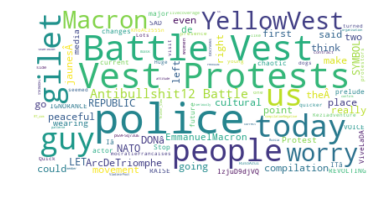

In [411]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text = ""
for index, row in result.iterrows():
    text = text + row[0]
    
stopwords = nk.corpus.stopwords.words('english')
stopwords=stopwords+["GiletJaune","GiletsJaune","GiletsJaunes","https","RT","Paris","France","co","Yellow Vest","Yellow"]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

On peut interpreter les termes les plus apparents tel que $"Police"$ puisque ces manifestations ont entrainées des altercations avec ces derniers, mais aussi $"Macron"$ qui est la cible principale de cet événement.
Mais encore, $"ArcDeTriomphe"$ qui a été vandalisé au cours de ces manifestations

In [412]:
df1, df2 = [x for _, x in df.groupby(df['Opinion'] == "Positive")]


In [413]:
df1.head()

,Tweet,Opinion
1,Is #France a prelude to major changes? Is the ...,Negative
4,"""@RusoAzul It was more like a contract between...",Negative
5,"""RT @Antibullshit12: 1/3 The Battle For Paris!...",Negative
6,"""RT @Antibullshit12: 2/3 The Battle For Paris!...",Negative
8,Hi @NATO could you confirm this guy is member ...,Negative


In [414]:
df2.head()

,Tweet,Opinion
0,ITâS SO SAD & REVOLTING! DONâT LET IGNORAN...,Positive
2,#ViveLaDÃ©mocratieFrancaises ð https://t.co...,Positive
3,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive
7,"""TODAY A SYMBOL OF REPUBLIC & FREEDOM HAS BEEN...",Positive
10,Poweful stuff going on in France ð® #GiletJaune,Positive


Après avoir séparé les tweets avec des opinions positives des tweets avec des opinions negatives, nous pouvons répeter le même processus respectivement pour les analyser separement.

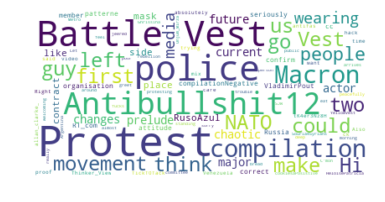

In [415]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text = ""
for index, row in df1.iterrows():
    text = text + row[0]
    
stopwords = nk.corpus.stopwords.words('english')
stopwords=stopwords+["GiletJaune","GiletsJaune","GiletsJaunes","https","RT","Paris","France","co","Yellow Vest","Yellow"]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

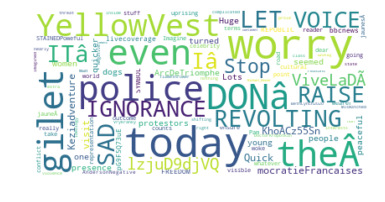

In [416]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text = ""
for index, row in df2.iterrows():
    text = text + row[0]
    
stopwords = nk.corpus.stopwords.words('english')
stopwords=stopwords+["GiletJaune","GiletsJaune","GiletsJaunes","https","RT","Paris","France","co","Yellow Vest","Yellow"]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Web Scraping

Après avoir utilisé le code commenté si dessous (Pour éviter une eventuelle ré-execution) nous avons récupéré 1000 nouveaux tweets concernant les gilets jaunes et nous allons procèder à la construction d'un nouveau $WordCloud$ 

In [417]:
#import tweepy
#import csv 
#api_key = 'deNbAQNlnHo5bvpD4MDNd1TQc'
#api_secret = 'dQgXQFvLCYIcRn8r7ixeTa6mHnK2d56t3Qn8EBBQSWAb1OlodA' 
#access_token = '1045361741138468864-avMMqOFpYkCScVjnmvZsBX0OL4HMZS'
#access_token_secret = 'IvTq5VUsVkMVxfwH02ItnmZURLizZxSdwk85WR9k9b3fC'
#auth = tweepy.OAuthHandler(api_key, api_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True)

#csvFile = open('giletsjaunes.csv', 'a')
#csvWriter = csv.writer(csvFile)

#for tweet in tweepy.Cursor(api.search,q="#giletsjaunes",
#                           lang="en").items(1):
#    csvWriter.writerow([[tweet.text]])

In [418]:
scraped= pd.read_csv("giletsjaunes.csv",names=["Tweet"])

In [419]:
scraped.head()

,Tweet
0,['RT @LeaveEUOfficial: WATCH | #GiletsJaunes a...
1,['RT @LeaveEUOfficial: WATCH | #GiletsJaunes a...
2,['RT @PartisanDE: The People will not give the...
3,['RT @armani_salado: Paris yesterday as the 12...
4,['RT @LeaveEUOfficial: WATCH | #GiletsJaunes a...


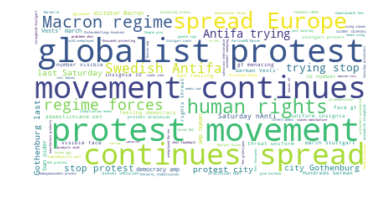

In [420]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text = ""
for index, row in scraped.iterrows():
    text = text + row[0]
    
stopwords = nk.corpus.stopwords.words('english')
stopwords=stopwords+["GiletJaune","GiletsJaune","GiletsJaunes","https","RT","Paris","France","co","Yellow Vest","YellowVestS","Yellow","nThis","Video","anti","BasedPoland"]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Opinion Classification

In [421]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 37):
    review = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [422]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [423]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [424]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [425]:
y_pred = classifier.predict(X_test)

In [426]:
from sklearn.metrics import confusion_matrix
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])

Predicted,Negative,Positive
True,,
Negative,2,3
Positive,3,0


Accuracy:

In [427]:
metrics.accuracy_score(y_test, y_pred)

0.25

In [428]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
y = labelencoder_X.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [429]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [430]:
rf = RandomForestClassifier(n_estimators=500)
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel="rbf",probability=True)
knn = KNeighborsClassifier(n_neighbors=20)
ada = AdaBoostClassifier()

Classifiers = pd.DataFrame(data={'ClassifierName': ["Naive Bayes" ,"Logistic Regression","SVM"] ,'Classifier': [nb,logreg,svm]})
Classifiers

,ClassifierName,Classifier
0,Naive Bayes,GaussianNB(priors=None)
1,Logistic Regression,"LogisticRegression(C=1.0, class_weight=None, d..."
2,SVM,"SVC(C=1.0, cache_size=200, class_weight=None, ..."


In [431]:
from sklearn.model_selection import cross_val_score
accuracy=[]
accuracies=[]
for index, row in Classifiers.iterrows():
    accuracies.append(round(cross_val_score(row['Classifier'], X, y, cv=10, scoring='accuracy').mean(),4))
    model = row['Classifier'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

In [432]:
Classifiers["Accuracy"]=accuracy
Classifiers["Accuracy(Cross Validated)"]=accuracies
Classifiers

,ClassifierName,Classifier,Accuracy,Accuracy(Cross Validated)
0,Naive Bayes,GaussianNB(priors=None),0.416667,0.5433
1,Logistic Regression,"LogisticRegression(C=1.0, class_weight=None, d...",0.750000,0.6883
2,SVM,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.666667,0.6300
